In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math
import importlib

In [3]:
from  standards import *
import Monte_Carlo as MC
import life_cycle_assessment as lc


importlib.reload(MC)

importlib.reload(lc)

Folder name Results created
Folder name Results created


<module 'life_cycle_assessment' from 'c:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\life_cycle_assessment.py'>

In [4]:
temp = [0] * 11
colors = plot_colors(temp,'turbo')

In [69]:
file = r'Data.xlsx'
sheet = 'Births net savings'

save_dir = r'Hospital_CDU_MDU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)

header = ['Kolding 4 MDUs', 'Kolding 1 CDU' ,'OUH 5 MDUs','OUH 1 CDU ', 'Svendborg 2 MDUs','Svendborg 1 CDU', 
          'Esbjerg 3 MDUs','Esbjerg 1 CDU', 'Vejle 3 MDUs','Vejle 1 CDU']

header2 = ['Kolding: 5 MDU vs 1 CDU', 'OUH: 6 MDU vs 1 CDU', 'Svendborg: 2 MDU vs 1 CDU', 
           'Esbjerg: 3 MDU vs 1 CDU',  'Vejle: 3 MDU vs 1 CDU']

# Select the range A51:M51
cost_pr_ton = data.iloc[49:50, 1:13]
cost_pr_ton


,2021,2022,2023,Unnamed: 4,Hospital,Municipalities,2021.1,2022.1,2023.1,4 L cylinder,50 L cylinder,50/50
49,660.170589,669.603052,394.996163,320.250816,857.336378,1745.558946,1330.429326,1803.979334,291599.930267,2313341.134167,804.714231,1089.506422


In [70]:
columns = cost_pr_ton.columns
columns = columns.to_list()
col_to_fuck_off = columns[8:10]

In [71]:
lst = []
for idx, row in cost_pr_ton.iterrows():
    for col in columns:
        if col not in col_to_fuck_off:
            lst.append(row[col])
            # print(row[col])

In [72]:

# col = data.columns
# col = col[1:13]
# lst = []

# for i in range(len(col)):
#     if i != 8 or i != 9:
#         lst.append(cost_pr_ton[col[i]])
#         print(cost_pr_ton[col[i]], i)


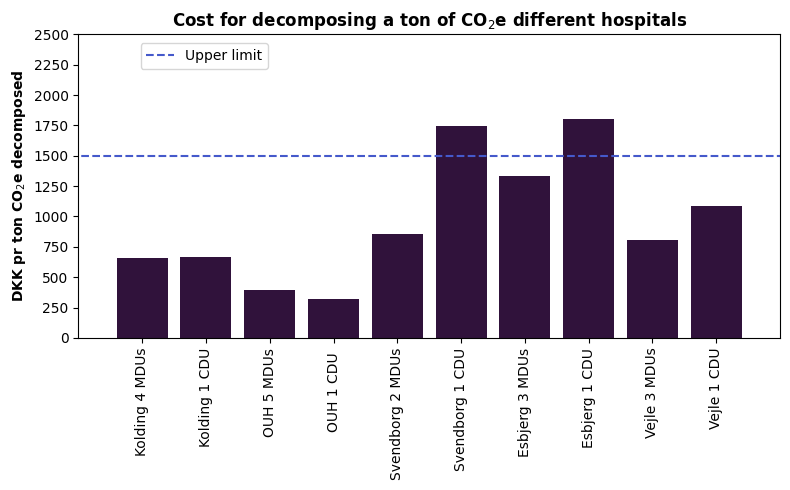

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(header, lst, color=colors[0]) 
ax.hlines(1500, -2, 10, color=colors[1], linestyle='dashed')
plt.ylim(0, 2500)
plt.xlim(-1, 10)
plt.yticks(np.arange(0, 2501, step=250))
ax.hlines(0,-1,14, color='k',linewidth=.5)

#ax.set_yscale('symlog')
plt.xticks(rotation=90)
plt.ylabel('DKK pr ton CO$_2$e decomposed', weight='bold')
plt.title('Cost for decomposing a ton of CO$_2$e different hospitals', weight='bold')

# Add legend for the dashed line
ax.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.27, 0.97), borderaxespad=0,)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'comparison_cost_pr_ton.jpg'), bbox_inches='tight')
plt.show()

In [74]:
data = pd.read_excel(file, sheet_name=sheet)


data_col = data.columns
data_col = data_col[28:]
data = data[data_col]




# Filter columns containing 'Use emissions' or 'impact' in their names
columns_to_drop = [col for col in data.columns if 'Use emissions' in col or 'impact' in col]

# Drop filtered columns
data = data.drop(columns=columns_to_drop)
data = data.drop(columns='Unnamed: 77')




col = data.columns
col1 = col[0]
col2 = col[1:]


plot_legend = ['MDU',
                   'CDU',
               'No DU']


counter = 0


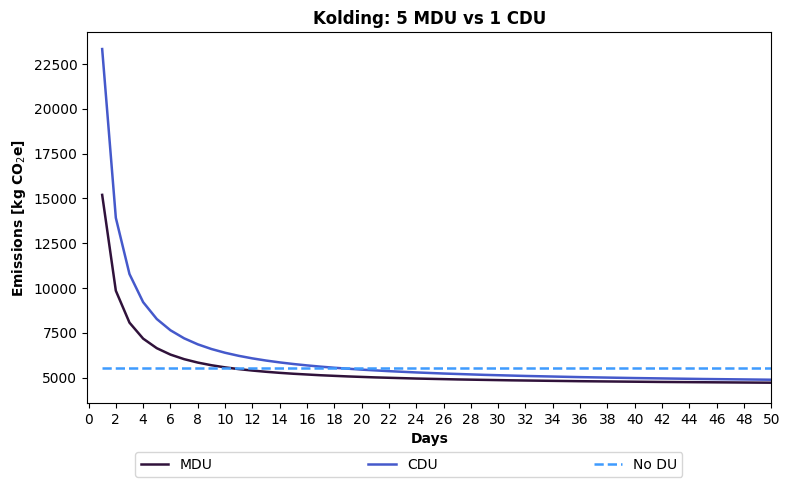

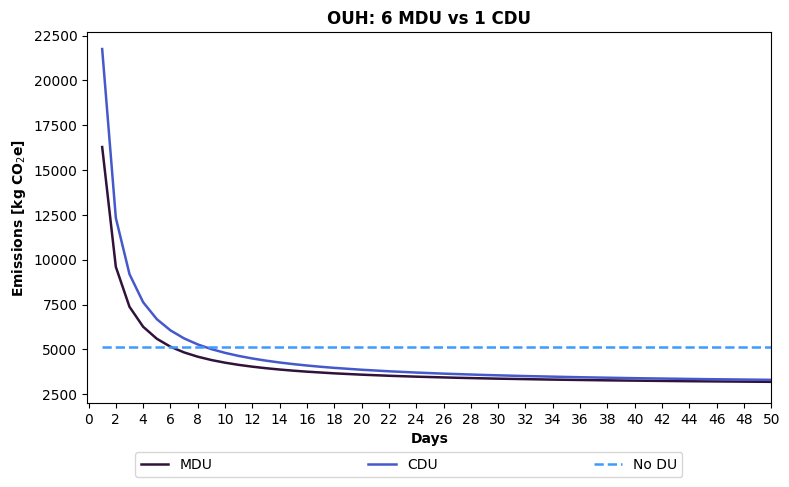

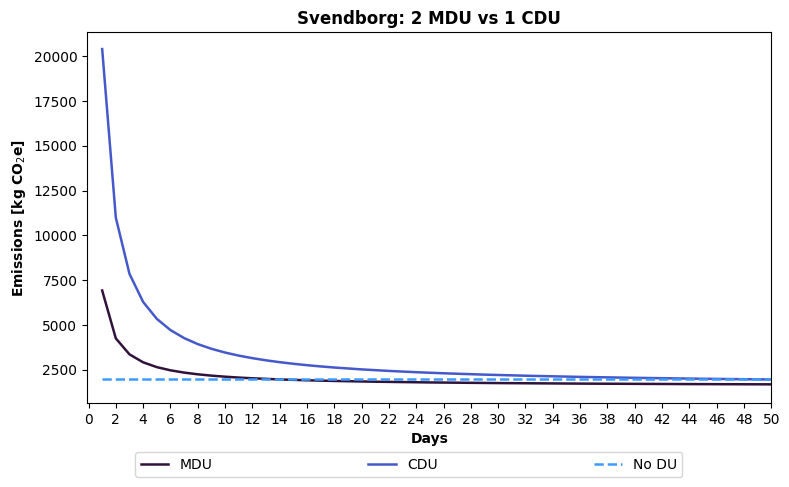

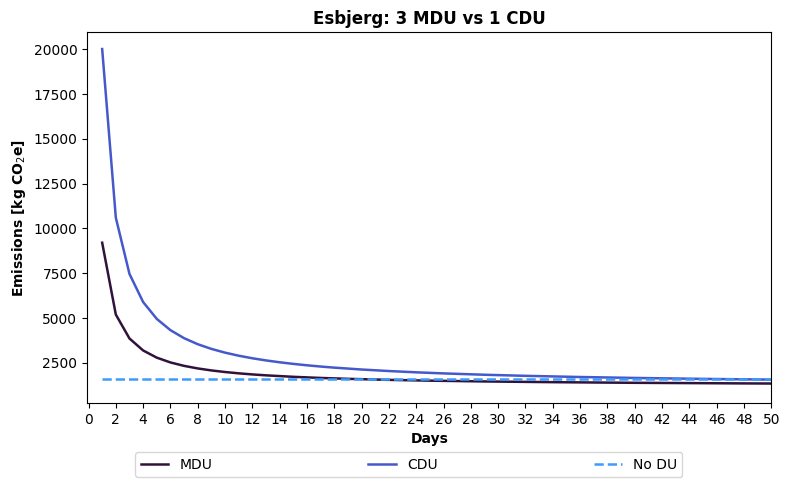

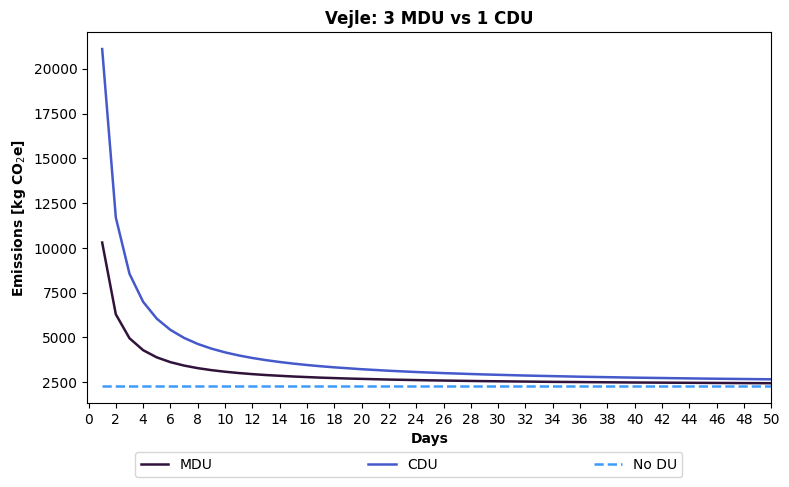

IndexError: list index out of range

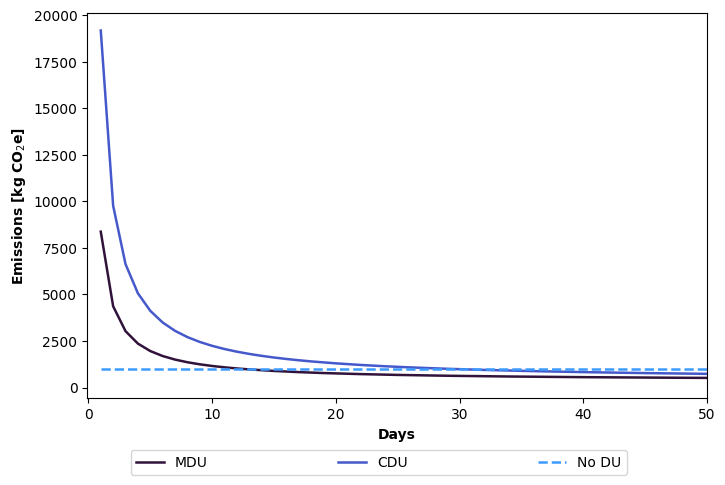

In [75]:
for i in range(0, int(len(col2)), 4):
    width = 1.8
    plt.subplots(figsize=(8, 5))
    #plt.rc('xtick', labelsize=16)
    plt.plot(data['Days'], data[col2[i]], color=colors[0], linewidth=width)
    plt.plot(data['Days'], data[col2[i+2]], color=colors[1], linewidth=width)
    plt.plot(data['Days'], data[col2[i+1]], color=colors[2], linestyle='dashed', linewidth=width)

    plt.ylabel('Emissions [kg CO$_2$e]',weight='bold')
    plt.xlabel('Days',weight='bold')
    plt.legend(plot_legend,bbox_to_anchor=(0.07, -0.2, 0.8, 0.2), loc="lower left",
            mode="expand", borderaxespad=0, ncol=3)
    plt.xlim(-0.1, 50)
    plt.title(f'{header2[counter]}',weight='bold')

    # Set x-axis ticks to integers with step of 1
    plt.xticks(np.arange(0, 51, step=2))
    

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, 'Break_even_{}_cost_sens.jpg'.format(counter)), bbox_inches='tight')
    plt.show()
    counter += 1

counter = 0

In [ ]:
file = r'Data.xlsx'
sheet = 'Births net savings'
data = pd.read_excel(file, sheet_name=sheet)
Annnual_cost = data.iloc[49:50, 1:13]
cost_col = Annnual_cost.columns
Annual_lst = np.zeros(12)
for i in range(len(cost_col)):
    Annual_lst[i] = Annnual_cost[cost_col[i]]
    

C:\Users\ruw\AppData\Local\Temp\8\ipykernel_22724\1462944783.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Annual_lst[i] = Annnual_cost[cost_col[i]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (12,).

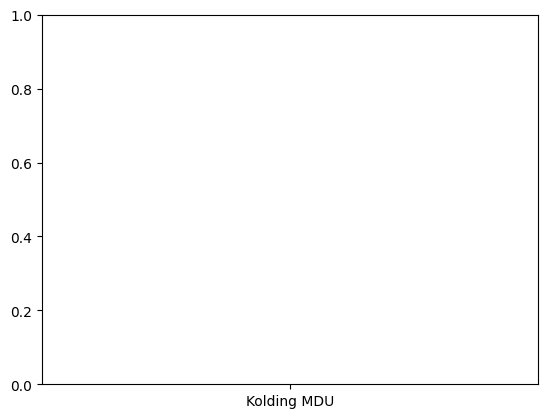

In [ ]:
fig, ax = plt.subplots()
ax.bar(header, Annual_lst/1000000, color=colors[0]) 

#plt.ylim(-250000, 100000)
plt.xlim(-1, 12)
#plt.yticks(np.arange(0, 3901, step=200))


#ax.set_yscale('symlog')
plt.xticks(rotation=90)
plt.ylabel('Annual payment [MDKK]', weight='bold')
plt.title('Annualized cost at the different hospitals', weight='bold')
# plt.gca().yaxis.set_major_formatter('mtick.PercentFormatter(1,decimals=0)')
# Add legend for the dashed line
#ax.legend(['Upper limit'], loc='upper right', bbox_to_anchor=(0.27, 0.97), borderaxespad=0,)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'comparison_annual_cost.jpg'), bbox_inches='tight')
plt.show()